In [13]:
import tensorflow as tf
from  tensorflow.contrib.lookup import MutableHashTable
from tensorflow.python.framework import constant_op
from tensorflow.python.framework import dtypes
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
digits, target = load_digits(return_X_y=True)

print digits.shape
print target.shape

(1797, 64)
(1797,)


In [47]:
digits[0,:].shape

(64,)

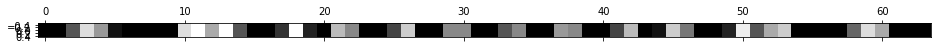

In [53]:
plt.gray()
plt.matshow(np.expand_dims(digits[0], axis=0))
plt.show()

In [54]:
def compute_signature(vec, rand_proj): 
    signature = 0
    projections = np.dot(vec, rand_proj)
    
    for proj in projections:
        signature <<= 1
        
        if proj >= 0:
            signature |= 1
            
    return signature

In [58]:
signature_length = 10  # This is a parameter of SRP. Commonly referred to as `d` or `D` in papers.
rand_proj = np.random.normal(size=(digits.shape[1], signature_length))
#print rand_proj.shape, rand_proj
hash_table = {}

for d in digits[1:]:
    hash_signature = compute_signature(d, rand_proj)
    matches = hash_table.setdefault(hash_signature, [])
    matches.append(d)

In [93]:
inp= tf.placeholder(tf.float32, shape=(64))
inp2 = tf.placeholder(tf.float32, shape=(64,10))
yh = tf.py_func(compute_signature, [inp, inp2], tf.int64)

In [94]:
p = np.dot(digits[1:][0], rand_proj)
print digits[1:][0].shape, rand_proj.shape
p.shape
[p1 for p1 in p]

(64,) (64, 10)


[-7.3626639662165898,
 27.544014193876592,
 -46.294339545489692,
 57.950895916378933,
 -17.819117131272986,
 62.287229153627315,
 -68.709285373595037,
 0.78184702916000859,
 -55.781885200863641,
 18.052247864219684]

In [96]:
with tf.Session() as session:
    tf.tables_initializer().run()
    tf.global_variables_initializer().run()
    ht = MutableHashTable(key_dtype=tf.string, value_dtype=tf.int64, default_value=66)
    key = constant_op.constant(['key'])
    value = constant_op.constant([42], dtype=dtypes.int64)
    session.run(ht.insert(key, value))
    v = session.run(ht.lookup(key))
    ret = session.run(yh, feed_dict={inp: digits[1:][0], inp2:rand_proj})

In [97]:
ret

341

In [4]:
print v

[42]
